In [2]:
# Ian Jenatz, Pablo Velasquez, Marlon Tzorin, David Corzo

# Logistic Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io

# Importing the dataset 
dataset = pd.read_csv('iris-data-clean.csv')

dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)
dataset['class'] = dataset['class'].replace('Iris-setosa', 0)
dataset['class'] = dataset['class'].replace('Iris-versicolor', 1)
dataset['class'] = dataset['class'].replace('Iris-virginica', 2)
dataset['class'].astype('int')

X = dataset.iloc[:, [0, 1]].values
X2 = dataset.iloc[:, [2, 3]].values

y = dataset.iloc[:, 4].values

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

In [4]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
classifier.fit(X_train2, y_train2)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)
y_pred2 = classifier.predict(X_test2)
print(y_pred2)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
cm2 = confusion_matrix(y_test2, y_pred2)
print(cm2)

[1 1 0 0 1 2 1 1 0 2 2 0 1 1 0 1 1 1 2 2 1 0 1 1 1 1 1 1 2 2 1 0 1 1 2 0 1
 0]
[1 2 1 1 0 2 2 1 1 1 0 0 1 0 0 1 2 1 0 0 0 0 1 0 1 1 1 0 0 2 0 1 1 2 0 1 2
 1]
[[3 6 5]
 [4 9 1]
 [2 6 2]]
[[14  0  0]
 [ 0 13  1]
 [ 0  4  6]]


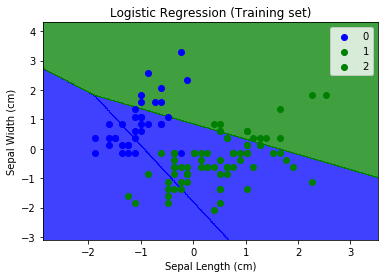

In [5]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

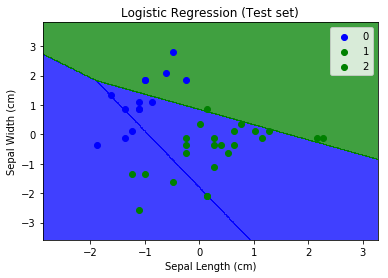

In [6]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

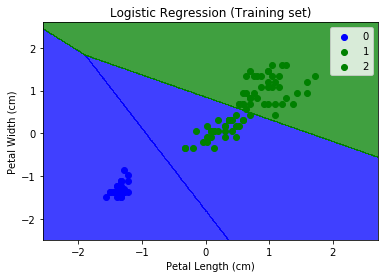

In [7]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train2, y_train2
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

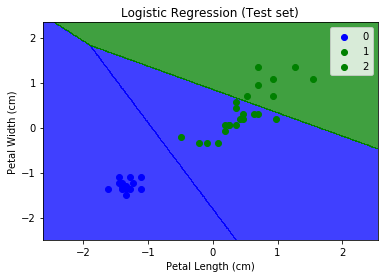

In [8]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test2, y_test2
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()